# FLIP (02) Optimization Data Science

---
Team Director: Meng Ren | mren@tulip.academy<br />

TULIP Academy <br />
http://www.tulip.academy 

---

# Stability and error propagation

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import math

from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16
rcParams['figure.figsize'] = (12,6)

## The problem with the problem

We have been finding the root of $f$: solution to

$$f(x) = 0,$$

using sequence $\{x_n\}$ from map $g : x_n \rightarrow x_{n+1}$. Map
designed such that fixed points of $g$ are roots of $f$. Have only
considered analytically known functions $f$, maps $g$, and round-off
error.

What if the error is much larger? E.g. $f$ given by numerical procedure
of limited accuracy. Is the iteration numerically stable?

For the rest of this section, only consider the original fixed point map

$$g(x) = x - f(x).$$

## Stability

By *stability*, mean small errors from map have only a small effect on
the answer. More precise: define map

$$G(x) = g(x) + \delta(x).$$

$\delta(x)$ is error in evaluating $g$; $G$ is resulting numerical
approximation. Resulting sequence is

$$X_{n+1} \equiv G(X_n) = g(X_n) + \delta_n, \quad n = 0, 1, 2,
    \dots$$

Do not expect $\{X_n\}$ to converge precisely; may expect ($n \to
  \infty$) $X_n$ approximates root up *maximum* error $\delta$.

### Example

In [3]:
def fn_iteration(f, x0, n_iterations = 100):
    """Functional iteration"""
    def g(x): 
        return x - f(x)
    iters = np.zeros((n_iterations+1,))
    iters[0] = x0
    for n in range(n_iterations):
        iters[n+1] = g(iters[n])
    
    return iters

def fn_iteration_with_noise(f, x0, n_iterations = 100, delta = 0.0):
    """Functional iteration with the addition of random noise, to simulate the effect of errors such as floating point."""
    def g(x): 
        return x - f(x)
    iters = np.zeros((n_iterations+1,))
    noise = np.random.rand(n_iterations)
    iters[0] = x0
    for n in range(n_iterations):
        iters[n+1] = g(iters[n]) + delta * noise[n]
    
    return iters

In [4]:
def f2(x):
    return -(x**3 - 13.0*x + 18.0) / 13.0

result1 = fn_iteration(f2, 1.0)
result2 = fn_iteration_with_noise(f2, 1.0, delta = 1e-3)

for i in [0, 1, 2, 10, 50, 100]:
    print("Result after {} iterations is {:6f} (no noise) or {:6f} (with noise)".format(i, result1[i], result2[i]))

Result after 0 iterations is 1.000000 (no noise) or 1.000000 (with noise)
Result after 1 iterations is 1.461538 (no noise) or 1.462167 (with noise)
Result after 2 iterations is 1.624768 (no noise) or 1.625403 (with noise)
Result after 10 iterations is 1.911737 (no noise) or 1.914185 (with noise)
Result after 50 iterations is 1.997695 (no noise) or 2.004453 (with noise)
Result after 100 iterations is 1.999958 (no noise) or 2.007329 (with noise)


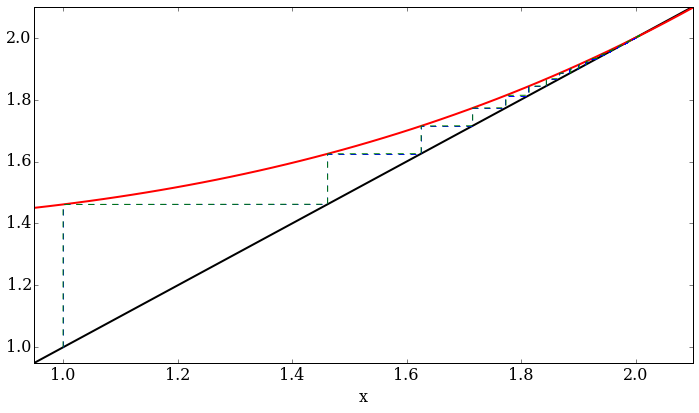

In [5]:
x = np.linspace(0.9, 2.1)
g2x = x - f2(x)
plot_results1 = np.empty((2*result1.size,))
plot_results1[0::2] = result1
plot_results1[1::2] = result1 - f2(result1)
plot_results2 = np.empty((2*result2.size,))
plot_results2[0::2] = result2
plot_results2[1::2] = result2 - f2(result2)

fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111)
ax.plot(x, x, 'k-', linewidth = 2)
ax.plot(x, g2x, 'r-', linewidth = 2)
ax.plot(np.repeat(result1,2), plot_results1, 'b--')
ax.plot(np.repeat(result2,2), plot_results2, 'g--')
ax.set_xlabel('x')
ax.set_xbound(0.95, 2.1)
ax.set_ybound(0.95, 2.1)
fig.tight_layout()
plt.show()

With $\delta \sim 10^{-3}$ this example is stable.

In [6]:
result3 = fn_iteration_with_noise(f2, 1.0, delta = 1e-1)

for i in [0, 1, 2, 10, 50, 100]:
    print("Result after {} iterations is {:6f} (no noise) or {:6f} (with large noise)".format(i, result1[i], result3[i]))

Result after 0 iterations is 1.000000 (no noise) or 1.000000 (with large noise)
Result after 1 iterations is 1.461538 (no noise) or 1.518761 (with large noise)
Result after 2 iterations is 1.624768 (no noise) or 1.690392 (with large noise)
Result after 10 iterations is 1.911737 (no noise) or 2.218311 (with large noise)
Result after 50 iterations is 1.997695 (no noise) or    nan (with large noise)
Result after 100 iterations is 1.999958 (no noise) or    nan (with large noise)


-c:2: RuntimeWarning: overflow encountered in double_scalars
-c:2: RuntimeWarning: invalid value encountered in double_scalars


-c:2: RuntimeWarning: overflow encountered in power
-c:2: RuntimeWarning: invalid value encountered in subtract
/Users/ih3/anaconda/lib/python3.4/site-packages/matplotlib/lines.py:656: RuntimeWarning: invalid value encountered in subtract
  return np.amin(x[1:] - x[0:-1]) >= 0


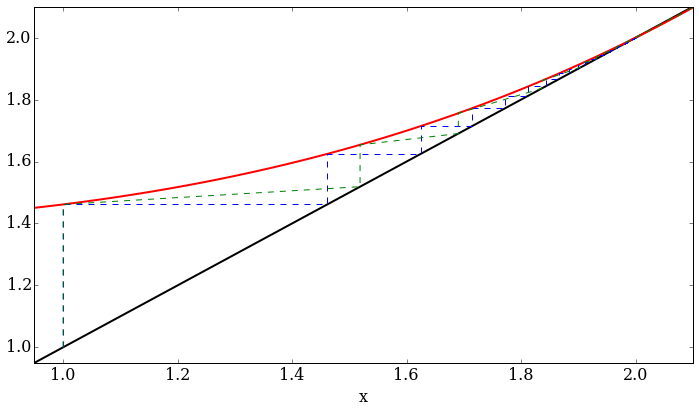

In [7]:
plot_results3 = np.empty((2*result3.size,))
plot_results3[0::2] = result3
plot_results3[1::2] = result3 - f2(result3)

fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111)
ax.plot(x, x, 'k-', linewidth = 2)
ax.plot(x, g2x, 'r-', linewidth = 2)
ax.plot(np.repeat(result1,2), plot_results1, 'b--')
ax.plot(np.repeat(result3,2), plot_results3, 'g--')
ax.set_xlabel('x')
ax.set_xbound(0.95, 2.1)
ax.set_ybound(0.95, 2.1)
fig.tight_layout()
plt.show()

With $\delta \sim 10^{-1}$ this example is unstable.

A close up of the random behaviour.

## Error propagation

### The error band

If error in evaluating $g$ is bounded by $|\delta_n| \leq \delta
  \,\,\, \forall n$ then error finding $x_{n+1}$ depends on $\delta$ and
slope $L$.

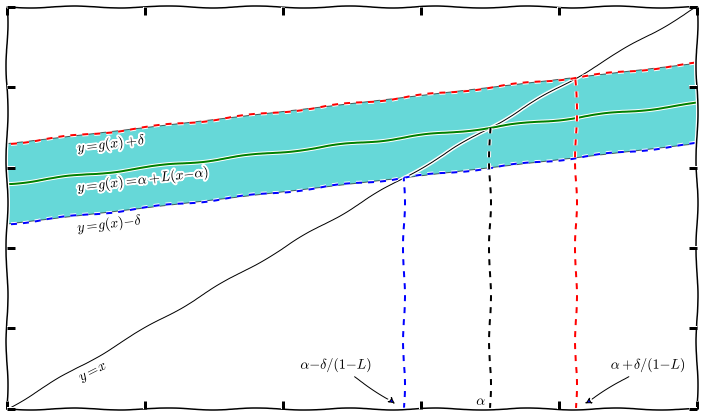

In [8]:
with plt.xkcd():
    x = np.linspace(-0.1, 1.1)
    L = 0.2
    angle = 180.0 / np.pi * math.atan(L)
    delta = 0.1
    alpha = 0.7
    ye = alpha + L * (x - alpha)
    yb = ye - delta
    yt = ye + delta
    fig = plt.figure(figsize = (10,6))
    ax = fig.add_subplot(111)
    xl = (alpha - delta / (1.0 - L)) * np.ones((2,))
    xm = (alpha) * np.ones((2,))
    xr = (alpha + delta / (1.0 - L)) * np.ones((2,))
    ax.plot(x, x, 'k-', linewidth = 1)
    ax.plot(x, ye, 'g-', linewidth = 2)
    ax.plot(x, yt, 'r--', linewidth = 2)
    ax.plot(x, yb, 'b--', linewidth = 2)
    ax.plot(xl, [0.0, xl[0]], 'b--')
    ax.plot(xm, [0.0, xm[0]], 'k--')
    ax.plot(xr, [0.0, xr[0]], 'r--')
    ax.fill_between(x, yt, yb, facecolor='c', alpha=0.6)
    ax.text(0.1, 0.1, r"$y=x$", rotation = 45 * 0.6)
    ax.text(0.1, alpha + L * (0.1 - alpha), r"$y = g(x) = \alpha + L (x - \alpha)$", rotation = angle * 0.6)
    ax.text(0.1, alpha + L * (0.1 - alpha) + delta - 0.02, r"$y = g(x) + \delta$", rotation = angle * 0.6)
    ax.text(0.1, alpha + L * (0.1 - alpha) - delta - 0.02, r"$y = g(x) - \delta$", rotation = angle * 0.6)
    ax.annotate(r"$\alpha - \delta / (1 - L)$", xy=(xl[0]-0.01,0.01), xytext=(xl[0]-0.15,0.1), 
                arrowprops=dict(arrowstyle='-|>'))
    ax.annotate(r"$\alpha + \delta / (1 - L)$", xy=(xr[0]+0.01,0.01), xytext=(xr[0]+0.05,0.1), 
                arrowprops=dict(arrowstyle='-|>'))
    ax.text(alpha-0.02, 0.01, r"$\alpha$")
    ax.set_xbound(0.0, 1.0)
    ax.set_ybound(0.0, 1.0)
    ax.tick_params(labelbottom = 'off', labelleft = 'off')
    fig.tight_layout()
plt.show()

### Theorem

Original convergence theorem bounded error $e_n = x_n - s$ as

$$|e_n| \leq \frac{L^n}{1 - L} |x_0 - x_1|.$$

For new sequence define $E_n = X_n - s$: bound the error by

$$|E_n| \leq L^n \left(R_0 - \frac{\delta}{1-L} \right) +
    \frac{\delta}{1-L}.$$

$R_0$ is new: depends on a *smaller* interval such that $G$ remains a
contraction mapping, despite error $\delta$.

Key results of this theory are

-   Sequence converges provided that $R_0$ exists, and

-   Best possible error is of order $\delta / (1 - L)$.

### Proof

Similar to original proof, but error means
$g(I) \subseteq I \nRightarrow G(I) \subseteq I$.

For root $s$ assume there exists interval
$I(s, r_0) = [s - r_0, s + r_0] \subseteq I$ on which $G$ contracts,
$G \left( I(s, r_0) \right) \subseteq I(s, r_0)$.

As in original proof, use induction, triangle inequality:

$$| s - X_n | \leq | g(s) - g(X_{n-1}) | + \delta \leq \dots \leq
    L^n | s - X_0 | + \frac{1 - L^n}{1 - L} \delta.$$

First term identical to original proof.

Finally construct $I(s, r_0)$: show that

$$|s - X_0| \leq R_0 \quad \text{where} \quad 0 < R_0 \leq r_0 -
    \frac{\delta}{1 - L} \quad \implies \quad | s - X_n | \leq r_0.$$

## Summary


-   The introduction of numerical error (e.g. by only knowing $f(x)$ to
    limited precision) affects the stability of the fixed point
    iteration methods.

-   If the error at any stage $\delta_n$ is bounded by $\delta$, then

    -   The cumulative error expected is $\delta / (1 - L)$

    -   The initial guess must be within $[s - R_0, s + R_0]$ where
        $R_0$ is defined by

        1.  The interval within which $g$ is a contracting map, $[s -
                    r_0, s + r_0]$, and

        2.  The error $\delta$ and Lipschitz constant $L$, as

        $$0 < R_0 \leq r_0 - \frac{\delta}{1-L}.$$

-   The proof of convergence is similar to the one without numerical
    error, but care must be taken over the interval to ensure that the
    *numerical* map $G$ does not map points outside the interval where
    the *analytical* map $g$ is contracting.